# Лабораторная работа 5

Вихляев Егор, ММТ-21

# 1. Загружаем данные

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Train.csv', sep=',')
df.head(10)

,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525,wheat
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371,sunflowerSeeds
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,694.0,50.5956,17.5203,0.9381,1.7647,710.0,694.0,1.0,29.7259,0.9775,0.8165,109.720,peas
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1752.0,135.4313,16.8499,0.9922,5.7401,1884.0,1761.0,-1.0,47.2305,0.9299,0.5771,276.205,sunflowerSeeds
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,314.0,48.1810,8.3713,0.9848,1.2984,329.0,314.0,1.0,19.9949,0.9544,0.8177,96.545,wheat


In [3]:
print(df.shape)

(430, 13)


Мы видим, что каждая четная строка $2n$, где $n \in \mathbb{N}$ представляет из себя просто набор запятых, что в датафрейме отображется как NaN. Соответственно, все четные строки необходимо будет удалить, что будет сделано в п. 4.

# 2. Выводим статистическую информацию о датасете 

In [4]:
df.describe(include='all')

,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,Class
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunflowerSeeds
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60
mean,832.144186,63.234226,15.305780,0.933431,-2.692709,901.037209,835.874419,0.069767,29.395838,0.925442,0.647439,136.537595,NaN
std,839.750421,41.410531,7.555325,0.105220,22.868972,939.131627,845.117057,2.535683,14.011307,0.062092,0.132145,86.072152,NaN
min,32.000000,6.582800,3.712800,0.107400,-88.452200,33.000000,32.000000,-23.000000,6.383100,0.610500,0.269400,18.616000,NaN
25%,308.000000,38.618400,9.822000,0.932750,-8.690500,328.000000,308.000000,1.000000,19.802750,0.918600,0.565600,82.312500,NaN
50%,477.000000,49.822900,14.790600,0.958400,-0.045800,526.000000,480.000000,1.000000,24.644200,0.942200,0.661800,105.262000,NaN
75%,797.000000,64.523750,17.637850,0.984050,6.250150,828.500000,798.000000,1.000000,31.855450,0.962550,0.754250,148.858000,NaN


# 3. Выводим названия столбцов и строк

In [5]:
print('Названия столбцов:\n', df.columns.tolist())
print('Названия строк:', df.index.tolist())

Названия столбцов:
 ['Area', 'MajorAxisLenght', 'MinorAxisLenght', 'Eccentricity', 'Orientation', 'ConvexArea', 'FilledArea', 'EulerNumber', 'EquivDiameter', 'Solidity', 'Extent', 'Perimeter', 'Class']
Названия строк: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 1

Очевидно, что поскольку строки просто пронумерорваны, то и их названиями будут просто числа от 0 до 430.

# 4. Заменяем или удаляем пропущенные значения

Поскольку пропущенные значения заменить нам нечем (они представляют из себя просто строки из запятых), то просто напросто удалим их.

In [6]:
for index, row  in df.iterrows():
    if index % 2 == 0:
        df = df.drop(index, axis=0)

df

,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,Class
1,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525,wheat
3,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371,sunflowerSeeds
5,694.0,50.5956,17.5203,0.9381,1.7647,710.0,694.0,1.0,29.7259,0.9775,0.8165,109.720,peas
7,1752.0,135.4313,16.8499,0.9922,5.7401,1884.0,1761.0,-1.0,47.2305,0.9299,0.5771,276.205,sunflowerSeeds
9,314.0,48.1810,8.3713,0.9848,1.2984,329.0,314.0,1.0,19.9949,0.9544,0.8177,96.545,wheat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,670.0,49.6982,17.2118,0.9381,1.3465,690.0,670.0,1.0,29.2074,0.9710,0.8043,108.231,peas
423,363.0,47.3902,9.8685,0.9781,6.8201,394.0,363.0,1.0,21.4985,0.9213,0.6576,96.512,wheat
425,693.0,50.9927,17.4658,0.9395,-2.0555,720.0,693.0,1.0,29.7045,0.9625,0.7549,111.994,peas
427,370.0,52.2731,9.1246,0.9846,-1.5970,388.0,370.0,1.0,21.7048,0.9536,0.8061,103.930,wheat


После удаления пропущенных значений, в датафрейме остается 215 строк, вместо 430 прежних.

# 5. Заменяем категориальные данные количественными

В нашем датасете имеется лишь один столбец с категориальными данными — столбец Class. В нем может быть четыре категориальных значения: wheat, sunflowerSeeds, peas, barley.

Чтобы заменить эти категориальные данные количественными, можно воспользоваться методом Label Encoding, поскольку у нас нет явного порядка категорий. 

Кодировка происходит по принципу соответствия наименьшего целого числа той букве (с которой начинается имя категории), которая раньше встречается в алфавите.

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Class'] = label_encoder.fit_transform(df['Class'])
df

,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,Class
1,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525,3
3,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371,2
5,694.0,50.5956,17.5203,0.9381,1.7647,710.0,694.0,1.0,29.7259,0.9775,0.8165,109.720,1
7,1752.0,135.4313,16.8499,0.9922,5.7401,1884.0,1761.0,-1.0,47.2305,0.9299,0.5771,276.205,2
9,314.0,48.1810,8.3713,0.9848,1.2984,329.0,314.0,1.0,19.9949,0.9544,0.8177,96.545,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,670.0,49.6982,17.2118,0.9381,1.3465,690.0,670.0,1.0,29.2074,0.9710,0.8043,108.231,1
423,363.0,47.3902,9.8685,0.9781,6.8201,394.0,363.0,1.0,21.4985,0.9213,0.6576,96.512,3
425,693.0,50.9927,17.4658,0.9395,-2.0555,720.0,693.0,1.0,29.7045,0.9625,0.7549,111.994,1
427,370.0,52.2731,9.1246,0.9846,-1.5970,388.0,370.0,1.0,21.7048,0.9536,0.8061,103.930,3


Соответственно имеем:
1. barley -> 0
2. peas -> 1
3. sunflowerSeeds -> 2
4. wheat -> 3

# 6. Выбираем важные признаки с помощью корреляционного анализа

In [8]:
import seaborn as sns

<Axes: >

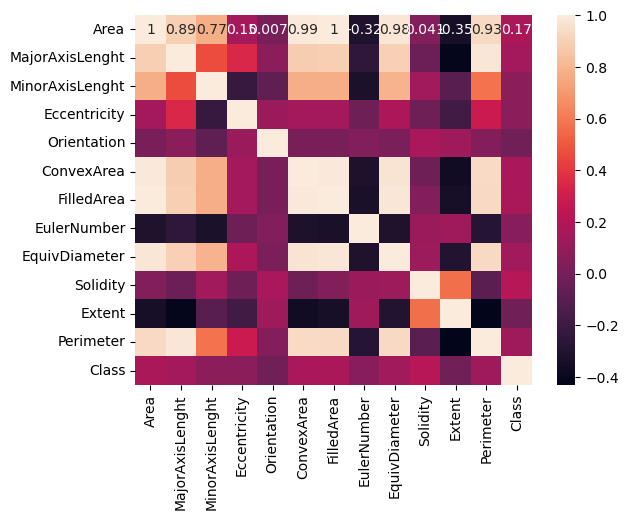

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

Поступим таким образом: зададим пороговое значение treshold = 0.5. Если коэффицент корреляции признаков по модулю превышает это значение — значит признаки считаются важными, иначе — неважными.

In [20]:
treshold = 0.5
important_features = corr_matrix['Class'] > treshold
print('Важные признаки\n', important_features)

Важные признаки
 Area               False
MajorAxisLenght    False
MinorAxisLenght    False
Eccentricity       False
Orientation        False
ConvexArea         False
FilledArea         False
EulerNumber        False
EquivDiameter      False
Solidity           False
Extent             False
Perimeter          False
Class               True
Name: Class, dtype: bool


Как видно из тепловой карты и сравнения с пороговым значением, все признаки, коррелирующие с целевой переменной, имеют коэффициенты корреляции меньшие, чем пороговое значение 0.5. 

# 7. Распределение наблюдений по классам

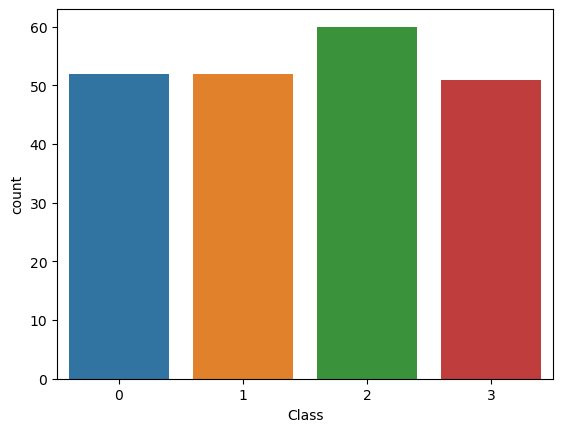

In [24]:
sns.countplot(data=df, x='Class')
plt.show()

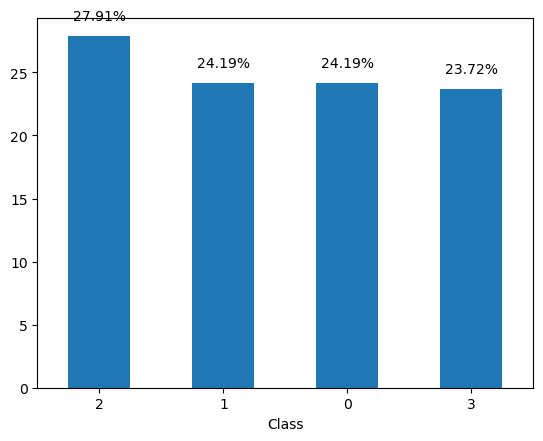

In [25]:
class_distribution = df['Class'].value_counts(normalize=True) * 100
class_distribution.plot(kind='bar', rot=0)
for i, v in enumerate(class_distribution):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

# 8. Разделим данные на признаки и ответы

In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [27]:
X

,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter
1,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525
3,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371
5,694.0,50.5956,17.5203,0.9381,1.7647,710.0,694.0,1.0,29.7259,0.9775,0.8165,109.720
7,1752.0,135.4313,16.8499,0.9922,5.7401,1884.0,1761.0,-1.0,47.2305,0.9299,0.5771,276.205
9,314.0,48.1810,8.3713,0.9848,1.2984,329.0,314.0,1.0,19.9949,0.9544,0.8177,96.545
...,...,...,...,...,...,...,...,...,...,...,...,...
421,670.0,49.6982,17.2118,0.9381,1.3465,690.0,670.0,1.0,29.2074,0.9710,0.8043,108.231
423,363.0,47.3902,9.8685,0.9781,6.8201,394.0,363.0,1.0,21.4985,0.9213,0.6576,96.512
425,693.0,50.9927,17.4658,0.9395,-2.0555,720.0,693.0,1.0,29.7045,0.9625,0.7549,111.994
427,370.0,52.2731,9.1246,0.9846,-1.5970,388.0,370.0,1.0,21.7048,0.9536,0.8061,103.930


In [28]:
y

1      3
3      2
5      1
7      2
9      3
      ..
421    1
423    3
425    1
427    3
429    0
Name: Class, Length: 215, dtype: int64

# 9. Построим классификаторы, используя kNN и градиентный бустинг